                   INTRODUCTION

My name is BADMUS HABEEB MUSTAPHA i am a data scientist and a biologist. The hospitality industry in Germany is dynamic and growing. in 2018, the industry witnessed an addition of more than 16,000 rooms and 200 hotels with the increasing number of tourist arrivals, the hospitality industry is projected to grow further in the future. I can confidently say that with my analytical skills, I can manipulate data using tools like Excel, SQL, Power BI, Python and R to gain insightful decisions. With the task  of completing the Data Analytics course at SeedBuilders Academy, the task  is to use the datasets made available to analyze,make prediction and  to visualize the data. With these, I will be introducing my 
Germany hotel Project at SeedBuilders.

In [ ]:
#import packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import 

In [2]:
df=pd.read_csv('C:/Users/Badmus/Downloads/hotels.csv')
df.head()

,Profit,Price in Millions,Square Meter,City
0,119000.0,21.88,3938.0,Berlin
1,250000.0,27.95,3986.0,Munich
2,250000.0,16.09,2574.0,Cologne
3,145000.0,27.58,4155.0,Munich
4,110000.0,23.76,3795.0,Berlin


# data description

* Profit - (How much money does this hotel make in a year)
* Price in Millions - price of hotel (€)
* Square Meter (Hotel Area)
* City - city hotel is located in

In [3]:
df.info

<bound method DataFrame.info of        Profit  Price in Millions  Square Meter     City
0    119000.0              21.88        3938.0   Berlin
1    250000.0              27.95        3986.0   Munich
2    250000.0              16.09        2574.0  Cologne
3    145000.0              27.58        4155.0   Munich
4    110000.0              23.76        3795.0   Berlin
..        ...                ...           ...      ...
145   45000.0              10.50        1775.0  Cologne
146  250000.0              23.80        4058.0  Cologne
147   32000.0              12.86        1668.0   Berlin
148   35000.0              15.80        2281.0   Berlin
149   90000.0              17.09        2297.0   Berlin

[150 rows x 4 columns]>

EDA

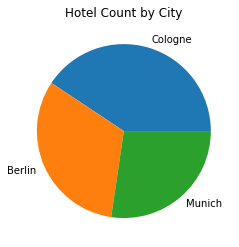

In [4]:
plt.pie(df.City.value_counts().values, labels=df.City.value_counts().index)
plt.title('Hotel Count by City')
plt.show()

The city of Cologne has more hotels than others in Germany

In [5]:
df[['Profit', 'Price in Millions', 'Square Meter']].describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,150.0,106126.666667,76413.507421,2000.00,45500.00,88500.000,137750.00,250000.00
Price in Millions,150.0,17.101933,6.531691,4.16,12.89,17.085,21.76,35.35
Square Meter,150.0,2594.680000,1434.491133,82.00,1499.00,2578.500,3628.00,5741.00


The max number of price for the hotels is 250000, and min is 2000
and they have a large square meter with the maximum as 5741 and minimum of 82

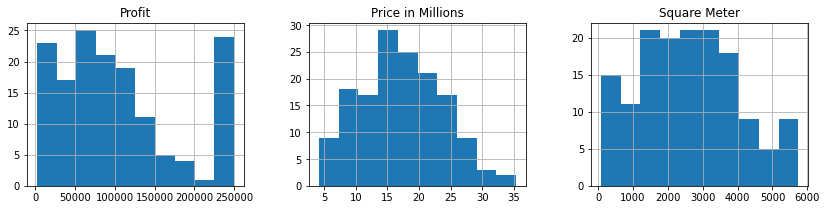

In [6]:
df[['Profit', 'Price in Millions', 'Square Meter']].hist(figsize=(14,3), layout=(1,3))
plt.show()

In [7]:
df.groupby("City").describe().T

City                            Berlin        Cologne         Munich
Profit            count      48.000000      61.000000      41.000000
                  mean    91000.000000  121475.409836  101000.000000
                  std     66476.999702   82418.769415   75549.652547
                  min      3000.000000    7000.000000    2000.000000
                  25%     34750.000000   57000.000000   45000.000000
                  50%     84500.000000  102000.000000   85000.000000
                  75%    124000.000000  163000.000000  128000.000000
                  max    250000.000000  250000.000000  250000.000000
Price in Millions count      48.000000      61.000000      41.000000
                  mean       17.119375      14.992623      20.219756
                  std         6.270263       6.152799       6.260068
                  min         6.620000       4.160000       7.840000
                  25%        12.950000      10.410000      16.150000
                  50%        17.175000      14.690000      19.370000
                  75%        21.892500      19.130000      23.440000
                  max        31.790000      28.490000      35.350000
Square Meter      count      48.000000      61.000000      41.000000
                  mean     2589.958333    2655.180328    2510.195122
                  std      1451.689331    1419.726376    1467.180071
                  min       114.000000     179.000000      82.000000
                  25%      1649.500000    1581.000000    1492.000000
                  50%      2630.000000    2574.000000    2501.000000
                  75%      3729.750000    3558.000000    3306.000000
                  max      5607.000000    5741.000000    5702.000000

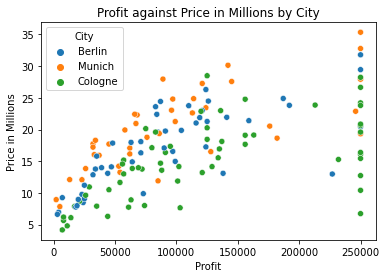

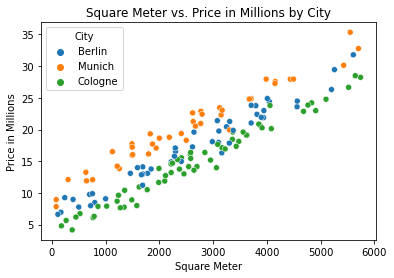

In [8]:
plt.title("Profit against Price in Millions by City")
sns.scatterplot(data=df, x="Profit", y="Price in Millions", hue="City")
plt.show()

plt.title("Square Meter vs. Price in Millions by City")
sns.scatterplot(data=df, x="Square Meter", y="Price in Millions", hue="City")
plt.show()

# Data modelling and one - hot - encoding 

In [21]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

In [23]:
df=pd.get_dummies(df)

In [12]:
df.head()

,Profit,Price in Millions,Square Meter,City_Berlin,City_Cologne,City_Munich
0,119000.0,21.88,3938.0,1,0,0
1,250000.0,27.95,3986.0,0,0,1
2,250000.0,16.09,2574.0,0,1,0
3,145000.0,27.58,4155.0,0,0,1
4,110000.0,23.76,3795.0,1,0,0


In [15]:
hotel_prices=df.copy()

In [16]:
#independent variables
X=hotel_prices.drop(columns="Price in Millions")
#sqrt transformation of profit
#X.Profit.apply(lambda x: np.sqrt(x))

#dependent variable
y=hotel_prices["Price in Millions"]

In [17]:
#split data into test and train data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, random_state=1)

In [24]:
#standardization
scaler=StandardScaler().fit(X_train)
#X_train=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
#X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Linear Regression

In [25]:
linearmodel = LinearRegression()

linearmodel.fit(X_train, y_train)

LinearRegression()

In [26]:
linearmodel.predict(X_test)

array([18.78372567, 16.93548577, 29.06478807, 14.96469344,  4.25458252,
       16.52590298, 14.61858031, 24.88406914, 15.64351857, 30.40937979,
       12.7318217 , 22.46805255, 18.565161  , 24.88539981, 24.77867147,
       18.32772514, 16.616019  ,  6.89926668, 14.62666968, 19.69025671,
        6.66594888,  9.2031942 , 15.48745699, 13.7646141 , 15.74384867,
       12.80789732, 13.11042242, 18.8863219 , 19.9323897 , 21.56123292])

In [27]:
linearmodel_prediction = linearmodel.predict(X_test)

In [28]:
# checking error for each prediction
y_test - linearmodel_prediction 

14     0.536274
98     0.734514
75    -1.124788
16    -0.804693
131    0.545417
56    -1.555903
141    0.661420
44    -0.104069
29     1.576481
120    1.380620
94    -0.831822
5      0.411947
102   -0.475161
51    -1.285400
78     0.031329
42    -0.207725
92     0.513981
66     0.050733
31    -1.046670
35    -0.320257
90    -0.045949
84    -1.223194
77    -0.587457
40     0.005386
125   -0.303849
99     1.172103
33    -0.020422
19    -0.246322
73     0.337610
146    2.238767
Name: Price in Millions, dtype: float64

The positive ones show that the prediction is higher than the actual values while the negative ones are below the actual values. Let's now measure this error by using the Root Mean Squared Error (RMSE).

In [30]:
import sklearn.metrics as metrics

MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)

In [31]:
MSE

0.7681059566941598

In [32]:
np.sqrt(MSE)

0.876416542914475

The RSME of linear regression is 0.876

# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

randomforestmodel = RandomForestRegressor()

randomforestmodel.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [36]:
MSE = metrics.mean_squared_error(y_test, randomforestmodel_prediction)

In [37]:
MSE

1.8995911126666796

In [38]:
np.sqrt(MSE)

1.3782565482038094

# Support Vector Machine

In [40]:
from sklearn.svm import SVR

SVMmodel = SVR()

SVMmodel.fit(X_train, y_train)

SVR()

In [41]:
SVMmodel_prediction = SVMmodel.predict(X_test)

In [42]:
MSE = metrics.mean_squared_error(y_test, SVMmodel_prediction)

In [43]:
MSE

6.3192469209231055

In [44]:
np.sqrt(MSE)

2.513811234146889

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

decisiontree =  DecisionTreeRegressor()

decisiontree.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
decisiontree_prediction = decisiontree.predict(X_test)

In [47]:
MSE = metrics.mean_squared_error(y_test, decisiontree_prediction)

In [48]:
MSE

4.279946666666667

In [49]:
np.sqrt(MSE)

2.0688031966977105

# KNeighbors Regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

kneighborsregressor =  KNeighborsRegressor()

kneighborsregressor.fit(X_train, y_train)

KNeighborsRegressor()

In [51]:
kneighborsregressor.predict(X_test)

array([22.212, 17.554, 28.84 , 14.06 ,  5.992, 18.05 , 15.044, 23.46 ,
       16.254, 24.982, 14.442, 24.426, 18.3  , 23.392, 24.186, 18.194,
       16.496,  8.846, 14.134, 21.206,  8.846,  8.81 , 15.936, 13.414,
       15.044, 12.068, 16.074, 20.874, 18.942, 21.834])

In [52]:
kneighborsregressor_prediction = kneighborsregressor.predict(X_test)

In [53]:
MSE = metrics.mean_squared_error(y_test, kneighborsregressor_prediction)

In [54]:
MSE

3.879116666666668

In [55]:
np.sqrt(MSE)

1.9695473253178426

# Ridge

In [56]:
from sklearn.linear_model import Ridge
ridge =  Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [57]:
ridge.predict(X_test)

array([18.8835724 , 16.94392813, 29.03487613, 14.96406739,  4.33193159,
       16.54262257, 14.70403492, 24.79219136, 15.645973  , 30.34578616,
       12.80433853, 22.51888467, 18.53854326, 24.78655617, 24.70668607,
       18.30665328, 16.58072311,  6.97777249, 14.62151008, 19.67557876,
        6.74677087,  9.26205017, 15.49528347, 13.77532813, 15.82641513,
       12.83382898, 13.19476294, 18.94213193, 19.88352248, 21.57037739])

In [58]:
ridge_prediction = ridge.predict(X_test)

In [59]:
MSE = metrics.mean_squared_error(y_test,ridge_prediction)

In [60]:
MSE

0.7644595468756187

In [61]:
np.sqrt(MSE)

0.8743337731528038

# Gradient Boosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)

GradientBoostingRegressor()

In [63]:
gradient.predict(X_test)

array([17.44001121, 18.53748721, 28.40019301, 16.74779659,  6.60898232,
       16.52311035, 14.84818319, 25.24337188, 16.47061844, 30.42637951,
       13.79895066, 22.20876998, 17.36198295, 24.5693553 , 24.24044301,
       17.93551534, 18.13920993,  8.01951214, 17.08838085, 19.85468005,
        7.82213173,  8.89278253, 16.04898423, 14.16286099, 16.18187697,
       12.05458519, 11.7374413 , 17.89497942, 20.48522607, 23.63615677])

In [64]:
gradient_prediction = gradient.predict(X_test)

In [65]:
MSE = metrics.mean_squared_error(y_test,gradient_prediction)

In [66]:
MSE

1.6920281380871203

In [68]:
np.sqrt(MSE)

1.300779819218887